<a href="https://colab.research.google.com/github/PraveenPrabhat125/Python-for-Data-Analyst/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
fmri = sns.load_dataset('fmri')
fmri.head()
df = fmri

df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [7]:
# 2. Data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [9]:
pd.isnull(df).sum()

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64

<ipython-input-12-db99f82d2c52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='region', data = df, palette = 'bright')


<Axes: xlabel='region', ylabel='count'>

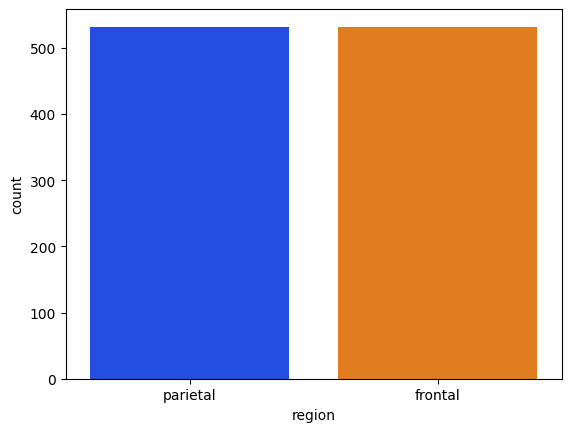

In [12]:
# data look good lets move for EDA
sns.countplot(x ='region', data = df, palette = 'bright')

In [13]:
df.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

In [17]:
summary1= df.groupby(['subject', 'event', 'region'], as_index = False).agg({
    'signal': 'sum'
}).sort_values(by = 'signal', ascending = False)

summary1.head()

,subject,event,region,signal
11,s10,stim,parietal,0.817399
7,s1,stim,parietal,0.816422
31,s3,stim,parietal,0.732207
55,s9,stim,parietal,0.653844
34,s4,stim,frontal,0.615503


<ipython-input-21-658dcdf471cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'subject', y = 'signal', data = summary1[:10], palette  = 'bright')


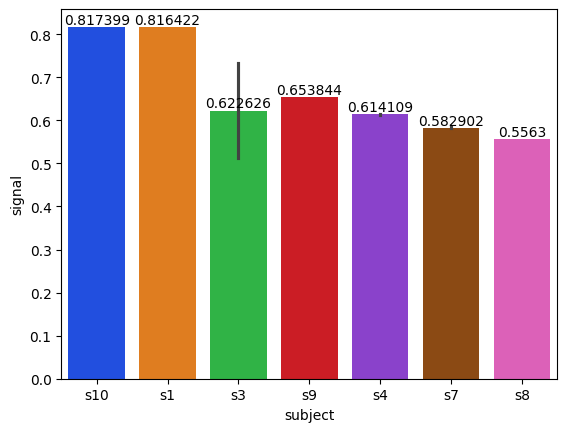

In [21]:
# subject with signal
ax = sns.barplot(x = 'subject', y = 'signal', data = summary1[:10], palette  = 'bright')

# bar label
for bars in ax.containers:
  ax.bar_label(bars)


<ipython-input-22-59c5d9a36862>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'region', y = 'signal', data = summary1[:10], palette  = 'bright')


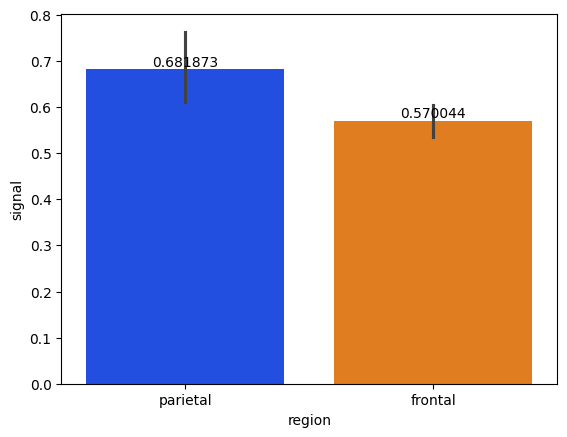

In [22]:
# subject with signal
ax = sns.barplot(x = 'region', y = 'signal', data = summary1[:10], palette  = 'bright')

# bar label
for bars in ax.containers:
  ax.bar_label(bars)

([<matplotlib.patches.Wedge at 0x797f89337dc0>,
 [Text(0.9224932459066493, 0.5991712703865352, 'frontal'),
  Text(-0.9224931898081824, -0.5991713567565833, 'parietal')],
 [Text(0.5031781341308995, 0.32682069293811006, '18.34%'),
  Text(-0.5031781035317359, -0.32682074004904543, '81.66%')])

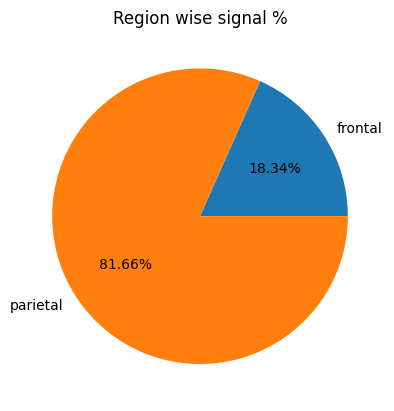

In [32]:
summary1.head()

regio_signal = df.groupby(['region'], as_index = False).agg({
    'signal': 'sum'
})
regio_signal

plt.title('Region wise signal %')
plt.pie(regio_signal['signal'], labels = regio_signal['region'], data = regio_signal, autopct= '%1.2f%%')


#

# 1. Line Plot

<Axes: xlabel='timepoint', ylabel='signal'>

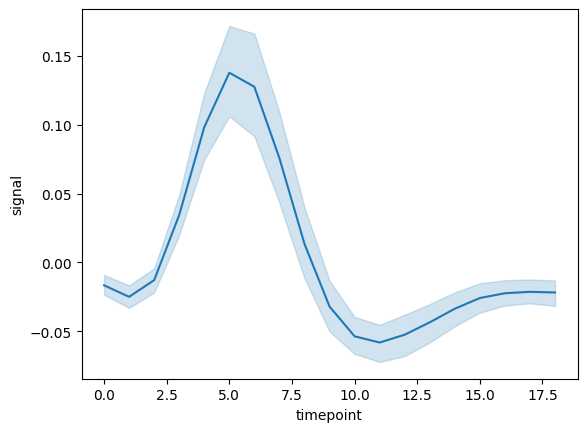

In [34]:
df.head()
sns.lineplot(x = 'timepoint', y = 'signal', data = df)

<Axes: xlabel='timepoint', ylabel='signal'>

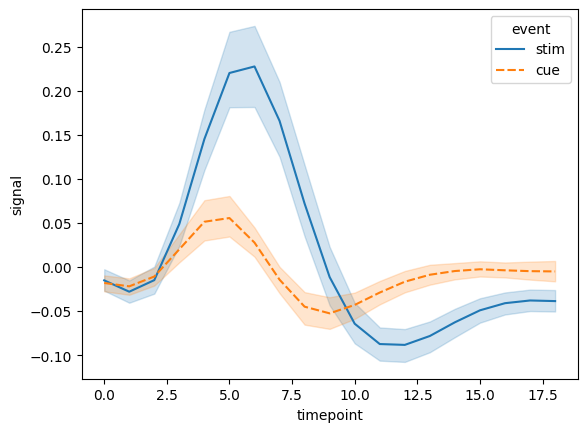

In [36]:

sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', data = df, style = 'event')

- stim event : Till 5sec the signal is increase to 20 then then sudden drop to 10 and then it stablized
- where as the event cue : seems less droped and then both get stablized

<Axes: xlabel='timepoint', ylabel='signal'>

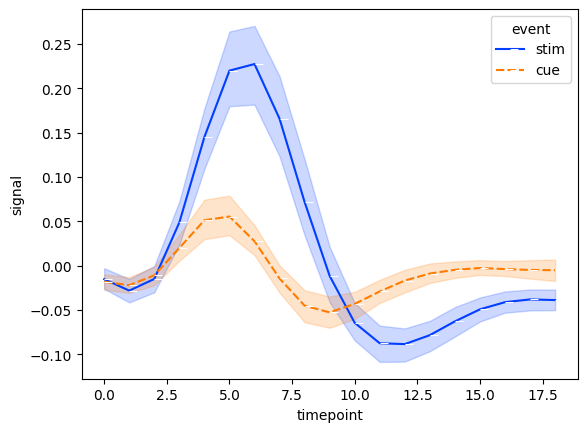

In [46]:
# df.head(10)
sns.lineplot(x = 'timepoint', y = 'signal', data =df, hue = 'event', style = 'event', marker = True, palette = 'bright')

# Bar Plot : Seaborn

In [51]:
df1 = pd.read_csv('/content/Diwali Sales Data.csv', encoding = 'latin-1')
df1.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [58]:
df1.columns
age_group = df1.groupby(['Age Group'], as_index = False).agg({
    'Orders': 'count'
}).sort_values(by	= 'Orders', ascending = False)

age_group

,Age Group,Orders
2,26-35,4543
3,36-45,2286
1,18-25,1879
4,46-50,987
5,51-55,832
6,55+,428
0,0-17,296


In [63]:
df1.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

<ipython-input-61-66856d536af6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Age Group', y = 'Orders', data = age_group, palette = 'bright')


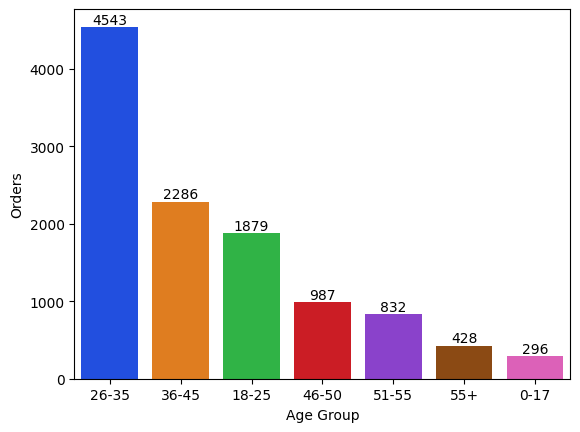

In [61]:

ax = sns.barplot(x = 'Age Group', y = 'Orders', data = age_group, palette = 'bright')

for bar in ax.containers:
  ax.bar_label(bar)

In [64]:
df1.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

# Scatter plot

In [71]:
dataset_names = sns.get_dataset_names()
dataset_names
# sns.load_dataset('iris')

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [74]:
dft = sns.load_dataset('titanic')
dft.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
dfi = sns.load_dataset('iris')
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Scatter plot

<Axes: xlabel='sepal_length', ylabel='petal_length'>

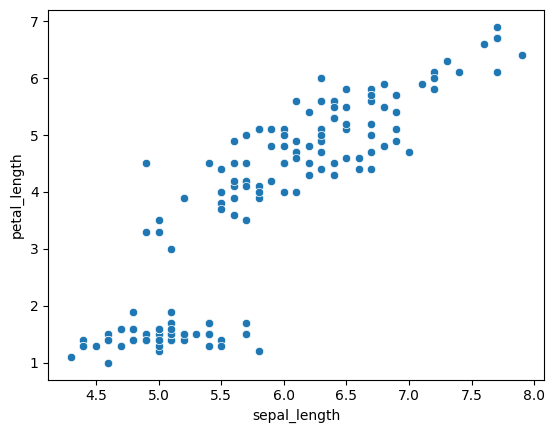

In [91]:
# dfi.columns
sns.scatterplot(x = 'sepal_length', y =  'petal_length' , data = dfi)

#### Insight
- As we can obswerve that when lenth of petal is increases the sepal lenth also increase

<Axes: xlabel='sepal_length', ylabel='petal_length'>

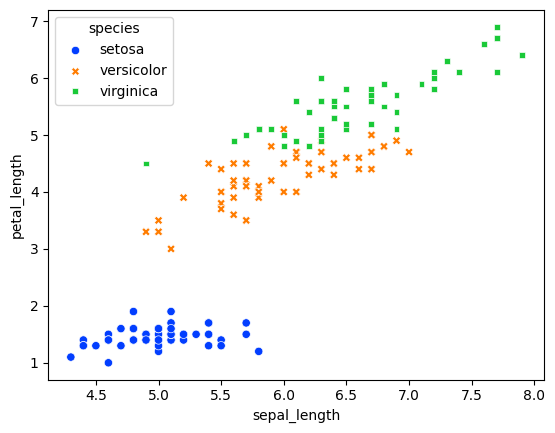

In [96]:
sns.scatterplot(x = 'sepal_length', y= 'petal_length', data = dfi, hue = 'species', palette= 'bright', style = 'species')

#### Insight
virginica have high petal and sepal length as compared to other species

In [114]:
petal_length = dfi['petal_length'].sort_values(ascending = False)
dfi['petal_length1'] = petal_length[:10]

dfi.info()
# sns.scatterplot(x = 'sepal_length', y= 'petal_length', data = dfi, hue = 'petal_length1', palette= 'bright')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   petal_length   150 non-null    float64
 3   petal_width    150 non-null    float64
 4   species        150 non-null    object 
 5   petal_length1  10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [115]:
dfi.describe()

,sepal_length,sepal_width,petal_length,petal_width,petal_length1
count,150.000000,150.000000,150.000000,150.000000,10.000000
mean,5.843333,3.057333,3.758000,1.199333,6.390000
std,0.828066,0.435866,1.765298,0.762238,0.317805
min,4.300000,2.000000,1.000000,0.100000,6.000000
25%,5.100000,2.800000,1.600000,0.300000,6.100000
50%,5.800000,3.000000,4.350000,1.300000,6.350000
75%,6.400000,3.300000,5.100000,1.800000,6.675000
max,7.900000,4.400000,6.900000,2.500000,6.900000


In [122]:
dfi.fillna(dfi['petal_length1'].mean(), inplace = True)
dfi.info()
# df_filled = df.fillna(df.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   petal_length   150 non-null    float64
 3   petal_width    150 non-null    float64
 4   species        150 non-null    object 
 5   petal_length1  150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   petal_length   150 non-null    float64
 3   petal_width    150 non-null    float64
 4   species        150 non-null    object 
 5   petal_length1  10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


# DistPlot/ Histogram
- continuous variable distribution

In [123]:
dataset_names = sns.get_dataset_names()
dataset_names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [127]:
dfd = sns.load_dataset('diamonds')
dfd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<ipython-input-135-cee2eac8612f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfd['price'], color = 'g') # it have both frequecy curve with histogram


<Axes: xlabel='price', ylabel='Density'>

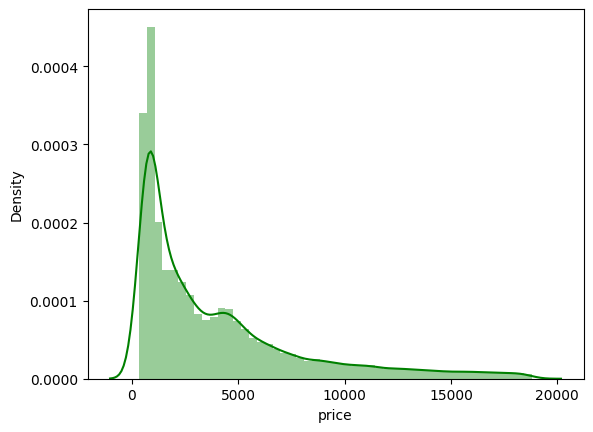

In [135]:
sns.distplot(dfd['price'], color = 'g') # it have both frequecy curve with histogram

<ipython-input-134-312cb0c4a341>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfd['price'], hist = False) # Only frequence curn


<Axes: xlabel='price', ylabel='Density'>

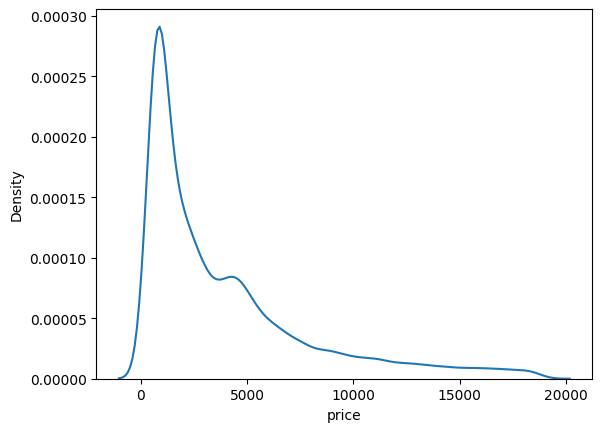

In [134]:
sns.distplot(dfd['price'], hist = False) # Only frequence curn

<ipython-input-138-ee006864a644>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfd['price'], bins = 10, kde = False) # Only Histogram


<Axes: xlabel='price'>

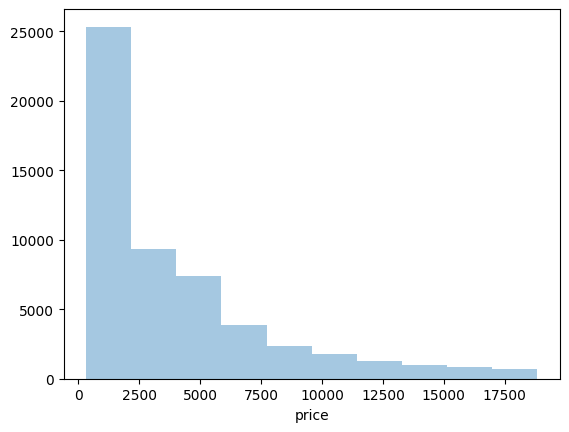

In [138]:
sns.distplot(dfd['price'], bins = 10, kde = False) # Only Histogram

<ipython-input-139-d9235c27218f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfd['price'], bins = 5, kde = False) # Only Histogram


<Axes: xlabel='price'>

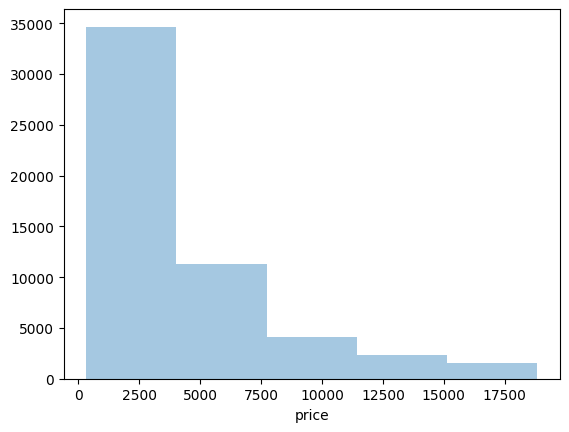

In [139]:
sns.distplot(dfd['price'], bins = 5, kde = False) # Only Histogram

Bins : The data will be divided into that size like bins = 5 then data/5 groups

<ipython-input-147-7667b4ae5001>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfd['price'], kde= False, bins = 6, color= 'g' ,vertical = True)


<Axes: ylabel='price'>

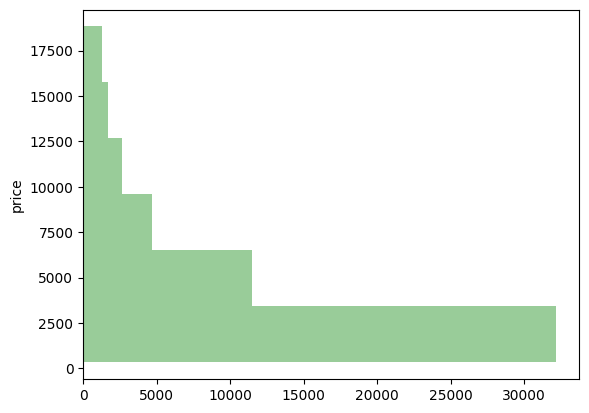

In [147]:
sns.distplot(dfd['price'], kde= False, bins = 6, color= 'g' ,vertical = True)

# Joint plot

In [151]:
sns.get_dataset_names()
dfii = sns.load_dataset('iris')
dfii.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


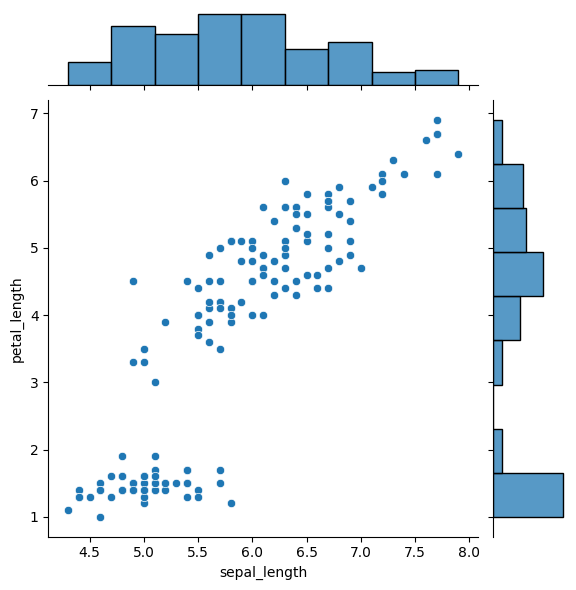

In [153]:
sns.jointplot(x = 'sepal_length', y = 'petal_length', data = dfii)

jointplot:
- have both scatter plot and the above the axs we have histogram for it

#### Regration Line
- we can add the regression line on histogram plot

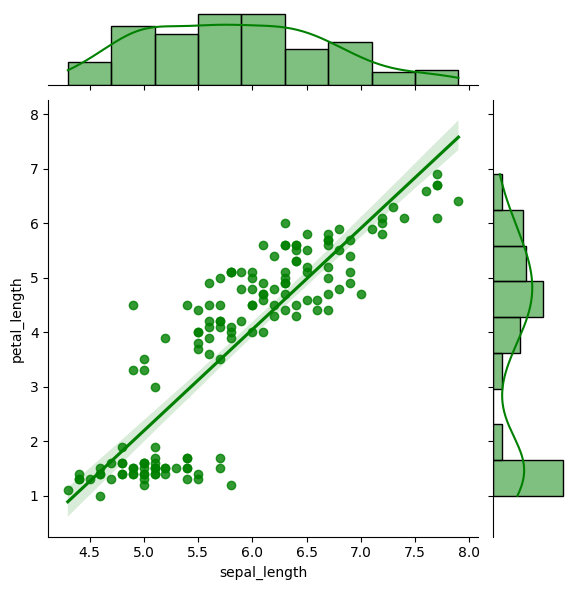

In [156]:
sns.jointplot(x = 'sepal_length', y = 'petal_length', color = 'g', data = dfii, kind = 'reg')

- Regression line is passing though both scatter line and histogram as well

# Box plot

<Axes: xlabel='species', ylabel='sepal_length'>

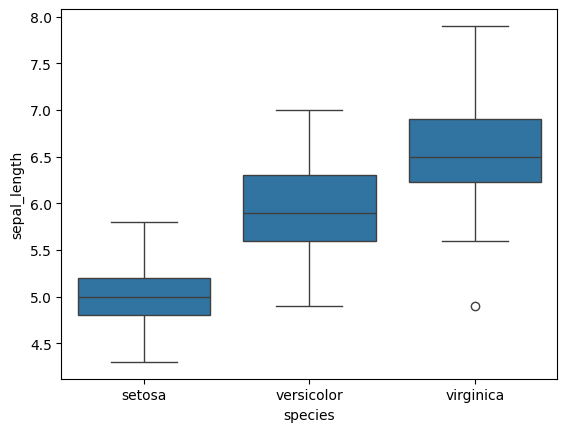

In [159]:
dfii.head(5)
sns.boxplot(x = 'species', y = 'sepal_length', data = dfii )

#### Insight
- sepal length of virginica is hiher among three species



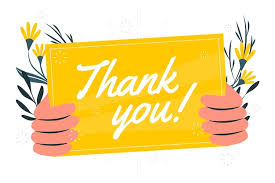